### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Purpose, assumptions, and key stakeholders 
We analysed data to provide insights that will help Turtle Games with its business objective to "improve overall sales performance by utilising cutomer trends". We did our analysis under the assumption that "sales performance" refers to the value of sales globally (North America, European Union, and other countries together). However, an alternative interpreation of "sales performance" could be one that takes into account how sales translate to profit. 

The marketing team at Turtle Games are key stakeholders for our work.


# Approach
Turtle Games provided us with two data sets, and metadata for the two data sets combined in a text file.

The data set file names are:\
`'turtle_reviews.csv'`\
`'turtle_sales.csv'`

Approximately half of our analysis was done with Python and is included in this notebook. The other half was done in R.

The original data, the meta data and our analysis (including this notebook and the R script) are in a [GitHub Repo](https://github.com/andreas-yiallouros/LSE_Turtle_Games).


We analysed the data over six weeks. Each week we focused on one of the initial set of six questions that Turtle Games provided to break down their overall business objective of improving sales.

The six questions as provided by Turtle Games were:
1.	How do customers accumulate loyalty points? (week 1 - Python)
2.	How can groups within the customer base be used to target specific market segments? (week 2 - Python)
3.	How can social data (e.g., customer reviews) be used to inform marketing campaigns? (week 3 - Python)
4.	What is the impact of each product on sales? (week 4 - R)
5.	How reliable is the data? (e.g., normal distribution, skewness, or kurtosis) (week 5 - R)
6.	What is the relationship(s) between North American, European, and global sales? (week 6 - R)

Only the data in `'turtle_reviews.csv'` is relevant to the goals for weeks 1 to 3.

**Our work with the second data set (`'turtle_sales.csv'`) in weeks 4 to 6 revealed an inconsistency between the two data sets. Following our iterative approach to data analysis we made an adjustment to the data in `'turtle_reviews.csv'` which changed our analysis and results for weeks 1 to 3. This is explained in the markdown comment after input 17 in this notebook.**

### Import the necessary libraries and packages
Our choice of libraries and packages is based on the goals for weeks 1 to 3.

In [1]:
# Import libraries and packages necessary for linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

# Week 1

## Week 1 | Goals
1. Data is understood and cleaned
2. How customers accumulate loyalty points is understood

### Week 1 | Goal 1
Data is understood and cleaned

#### Week 1 | Goal 1 | Step 1
Load the data

In [2]:
# Load 'turtle_reviews.csv' and create DataFrame.
df_reviews = pd.read_csv('turtle_reviews.csv')

#### Week 1 | Goal 1 | Step 2
Explore the data
1. Understand what the data represents
2. Check for missing values

###### Information in 'metadata_turtle_games.txt'


| # | Column name | What the column represents |
| - | :--------------------------- | :---------------------------------------------------------------------- |
| 0 | `'gender'` | gender of the customer|
| 1 | `'age'` | age of the customer in years |
| 2 | `'remuneration (k£)'` | customer's total annual income in thousands of £|
| 3 | `'spending_score (1-100)'` | score assigned by Turtle Games based on the customer's spending nature and behaviour |
| 4 | `'loyalty_points'` | score assigned by Turtle Games based on monetary value of purchases |
| 5 | `'education'` | highest level of education obtained by the customer |
| 6 | `'language'` | all reviews were in English |
| 7 | `'platform'` | all reviews were obtained through the Turtle Games website |
| 8 | `'product'` | code for the product based on its description |
| 9 | `'review'` | text from reviews by customers on the products they purchased and used |
| 10 | `'summary'` | summary of customer's review |


In [3]:
# View the first five rows of df_reviews.
df_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# View information about df_reviews.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


###### Comment on data types
Based on the description in the metadata text file (see below for summary), the data type for all columns seems reasonable with the exception of the column `'product'` (representing the product code) which we could change from `int64` to `object`.

In [5]:
# Change the data type of 'product' from integer to object.
df_reviews = df_reviews.astype({'product': object})

In [6]:
# Check data type change was done.
df_reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                    object
review                     object
summary                    object
dtype: object

##### Check for missing values
Missing values can affect the results of our analysis in unexpected and undesired ways.

We've already seen from running the `.info()` method that there are no missing values in our data because for all columns all 2000 records show `'No-Null Count'`.

###### Additional check for missing values
We could run an additional check using the `isnull()` method on each of the columns as per the example in the code snippet below.

In [7]:
# Additional check for missing values.
df_reviews[df_reviews['gender'].isnull()]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


###### Comment on missing values

The code snippet above would have returned the rows where `'gender'` had no value. No rows were returned, meaning there are no missing values in the column `'gender'`.

The same result is returned for each of the other ten columns.

To keep this notebook short we deleted the check for the ten columns.

In [8]:
# View summary of descriptive statistics.
df_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


###### Summary of what we see from exploring the data in `df_reviews`
From looking at the:
- metadata text file
- top five rows of the DataFrame
- return from applying the `.info()` method
- check for missing values
- summary of descriptive statistics

we see that:
- each row in `'turtle_reviews.csv'` gives information for each of 2,000 individual customers
- there are no missing values
- the range of values in each column seems reasonable
- the `'language'` column may be redundant given all review comments are in English
- the `'platform'` column may be redundant given all review comments were obtained from the Turtle Games website

#### Week 1 | Goal 1 | Step 3
Remove redundant columns and export to `csv`

In [9]:
# Remove the redunctant columns - 'language' and 'platform'.
df_reviews = df_reviews.drop(columns=['language', 'platform'])

In [10]:
# Change the columns names to names easier to reference.
df_reviews = df_reviews.rename(
    columns={'remuneration (k£)': 'remuneration',
            'spending_score (1-100)': 'spending_score',
            'product': 'product_code',
            'review': 'review_full_text',
            'summary': 'review_summary'})

In [11]:
# Check removal and rename of columns done as expected.
df_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_code,review_full_text,review_summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
df_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_code,review_full_text,review_summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
# Create filter to retain product codes < 9081.
filt = df_reviews.product_code < 9081

In [14]:
# Filter out records relating to product codes that are not in 'turtle_sales.csv'
df_reviews = df_reviews[filt]

In [15]:
# Write the cleaned data to a csv file.
df_reviews.to_csv('turtle_reviews_clean.csv')

In [16]:
# Import the cleaned data from the new csv file.
df_reviews_clean = pd.read_csv('turtle_reviews_clean.csv')

In [17]:
# View first five rows of the cleaned DataFrame.
df_reviews_clean.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product_code,review_full_text,review_summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### >>> Decision to filter out reviews relating to products that are not included in `turtle_sales.csv`.
We used Excel filtering of unique values and sorting to compare the list of products in `turtle_reviews.csv` to the list of products in `turtle_sales.csv` and saw that all 175 products in the latter were included in the former. However, `turtle_reviews.csv` includes an additional 25 product codes (range `9119` to `11086`) not included in `turtle_sales.csv`.

In addition, from looking at some of the review comments we noted that at least some of the 25 product codes relate to products other than video games.

We decided to filter these out to avoid the risk of introducing noise into our analysis, especially in the context of the review comments sentiment analysis. This resulted in removing 250 out of the 2,000 review records. 

In [18]:
# Change the data type of 'product_code' from integer to object.
df_reviews_clean = df_reviews_clean.astype({'product_code': object})

In [19]:
# Drop the column 'Unnamed: 0'.
df_reviews_clean = df_reviews_clean.drop(columns='Unnamed: 0')

In [20]:
# Sense-check shape.
df_reviews_clean.shape

(1750, 9)

In [21]:
# Sense-check info.
df_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1750 non-null   object 
 1   age               1750 non-null   int64  
 2   remuneration      1750 non-null   float64
 3   spending_score    1750 non-null   int64  
 4   loyalty_points    1750 non-null   int64  
 5   education         1750 non-null   object 
 6   product_code      1750 non-null   object 
 7   review_full_text  1750 non-null   object 
 8   review_summary    1750 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 123.2+ KB


In [22]:
# View summary of descriptive statistics on filtered data set.
df_reviews.describe()

,age,remuneration,spending_score,loyalty_points
count,1750.000000,1750.000000,1750.000000,1750.000000
mean,39.343429,47.464411,50.108571,1564.399429
std,13.374463,23.521944,26.195458,1291.007770
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,27.060000,32.000000,752.500000
50%,38.000000,46.740000,50.000000,1265.500000
75%,49.000000,63.960000,73.000000,1707.000000
max,72.000000,112.340000,99.000000,6847.000000


**Comment**

The descriptive statistics for the filtered data set are very similar to those for the unfiltered data set.

###### Sense-check results
The shape and metadata are as expected.

###### Questions remaining at the end of out data exploration and cleaning

1. What are the controls in place to ensure the accuracy, completeness, and validity of the data in `'turtle_reviews.csv'`?



2. How were the 2,000 customers selected?



3. What other columns are available and relevant to our analysis, but not included in `df_reviews`?



4. The metadata describes `'spending_score'` as 'a score (between 1 and 100) assigned to each customer based on the customer's spending nature and behaviour'.\
How are 'spending nature' and 'spending behaviour' measured?\
How is `'spending_score'` mapped to 'spending nature' and spending behaviour' measures?\
Are spending scores comparable across customers?



5. The metadata describes `'loyalty_points'` as 'a score based on the point value of the purchase'.\
How are `'loyalty_points'` mapped to 'purchase value' (for example, is it one loyalty point per £1 of purchase)?

### Week 1 | Goal 2
How customers accumulate loyalty points is understood

#### Understanding the question
The question as expressed by Tutle Games is
> 'How do customers accummulate loyalty points?'

One way to reformulate and break down the question is
> Does the number of loyalty points accummulated by customers depend on or vary in line with the customer's (1) `'age'`, (2) `'remuneration'`, or (3) `'spending_score'`?

To begin towards answering the question we will assess the degree to which there may be a linear relationship between loayalty points as the dependent variable and each of `'age'`, `'remuneration'` and `'spending_score'` as the independent variables.

In [23]:
# View the correlation between each pair of variables.
df_reviews_clean.corr()

,age,remuneration,spending_score,loyalty_points
age,1.000000,0.012766,-0.241476,-0.038950
remuneration,0.012766,1.000000,0.008998,0.628517
spending_score,-0.241476,0.008998,1.000000,0.658235
loyalty_points,-0.038950,0.628517,0.658235,1.000000


### (1) Relationship between customer `'age'` and `'loyalty_points'`

In [24]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['age']

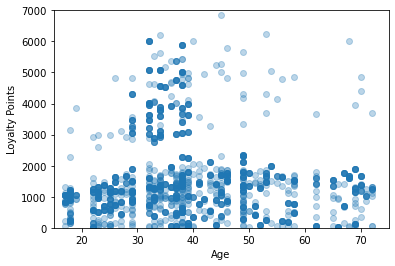

In [25]:
# Visualise the scatterplot of 'age' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3) 
"""To see the concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(15,75)

# Label the axes.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [26]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [27]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.656
Date:                Mon, 02 Jan 2023   Prob (F-statistic):              0.103
Time:                        08:52:43   Log-Likelihood:                -15017.
No. Observations:                1750   AIC:                         3.004e+04
Df Residuals:                    1748   BIC:                         3.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1712.3224     95.865     17.862      0.000    1524.301    1900.344
x             -3.7598      2.307     -1.630      0.103      -8.285       0.765
==============================================================================
Omnibus:                      448.054   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.523
Skew:                           1.505   Prob(JB):                    7.05e-199
Kurtosis:                       4.859   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept    1712.322390
x              -3.759788
dtype: float64


In [29]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    95.864529
x             2.307024
dtype: float64


In [30]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1644.64620119 1625.84725978 1629.60704807 ... 1584.48958869 1584.48958869
 1592.00916526]


In [31]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (1736.517739) + (-4.012805) * df_reviews_clean['age']

In [32]:
# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1745    1588.043954
1746    1563.967124
1747    1600.082369
1748    1600.082369
1749    1608.107979
Name: age, Length: 1750, dtype: float64

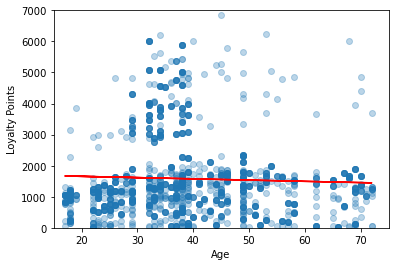

In [33]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(15,75)

# Label the axes.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [34]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [35]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 7.366965338658188, 'LM Test p-value': 0.006643295125466583, 'F-stat': 7.389654135919047, 'F-test p-value': 0.0066248321926583795}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'age'`).

*Linearity*\
The amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 0.2% (`'R-squared'` is 0.002). Therefore the linearity assumption seems not to be met either.

Looking at the scatterplot and the density of the data points for the age range 30 to 40, loyalty points may peak at ages 30 to 40.

After our presentation to our stakeholders at Turtle Games of our initial data analysis results we will consider performing additional analysis to identify a non-linear model that may be a good fit to our data.  

### (2) Relationship between customer `'remuneration'` and `'loyalty_points'`

In [36]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['remuneration']

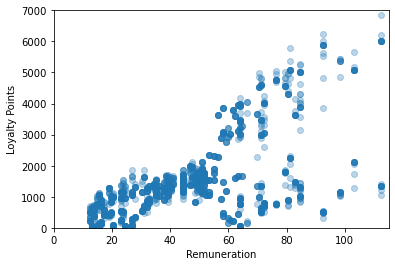

In [37]:
# Visualise the scatterplot of 'remuneration' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3)
"""To see concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0,115)

# Label the axes.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [38]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [39]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          5.19e-193
Time:                        08:52:44   Log-Likelihood:                -14578.
No. Observations:                1750   AIC:                         2.916e+04
Df Residuals:                    1748   BIC:                         2.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.9486     54.086     -1.349      0.178    -179.028      33.131
x             34.4963      1.021     33.785      0.000      32.494      36.499
==============================================================================
Omnibus:                       25.436   Durbin-Watson:                   3.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.552
Skew:                           0.112   Prob(JB):                     1.56e-09
Kurtosis:                       3.711   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -72.94859
x            34.49633
dtype: float64


In [41]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    54.085586
x             1.021058
dtype: float64


In [42]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [ 351.35627401  351.35627401  379.64326493 ... 3123.48138404 3321.49032047
 3123.48138404]


In [43]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (-65.686513) + (34.187825) * df_reviews_clean['remuneration']

In [44]:
# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1745    2821.817186
1746    3102.157351
1747    3102.157351
1748    3298.395467
1749    3102.157351
Name: remuneration, Length: 1750, dtype: float64

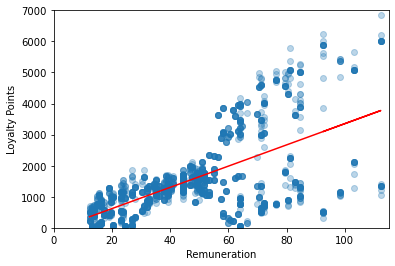

In [45]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0,115)

# Label the axes.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [46]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [47]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 913.7844538442791, 'LM Test p-value': 9.891706579687317e-201, 'F-stat': 1910.1477276557953, 'F-test p-value': 1.2952762863101897e-282}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'remuneration'`).

We could apply a transformation to our data to address the heteroskedasticity issue. We will consider whether to do this after our presentation to our stakeholders at Turtle Games of our initial data analysis results.  

*Amount of variance explained by our model*\
With the caveat of the heteroskedasticity issue which might affect the reliability of our liner regression, the amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 38% (`'R-squared'` is 0.38).

### (3) Relationship between customer `'spending_score'` and `'loyalty_points'`

In [48]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['spending_score']

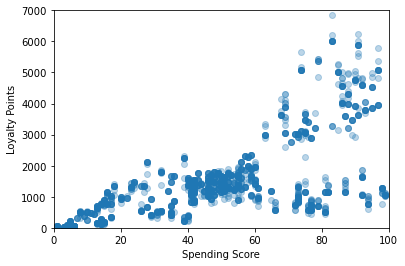

In [49]:
# Visualise the scatterplot of 'spending_score' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3)
"""To see concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0, 100)

# Label the axes.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [50]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [51]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1336.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          8.13e-218
Time:                        08:52:44   Log-Likelihood:                -14521.
No. Observations:                1750   AIC:                         2.905e+04
Df Residuals:                    1748   BIC:                         2.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.1348     50.173     -1.218      0.223    -159.540      37.270
x             32.4402      0.887     36.557      0.000      30.700      34.181
==============================================================================
Omnibus:                      124.786   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.666
Skew:                           0.494   Prob(JB):                     6.69e-52
Kurtosis:                       4.502   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -61.134802
x            32.440243
dtype: float64


In [53]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    50.172791
x             0.887399
dtype: float64


In [54]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1204.03467261 2566.52487647  133.5066553  ... 2890.92730596  457.90908479
  198.38714119]


In [55]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (-75.052663) + (33.061693) * df_reviews_clean['spending_score']

In [56]:
# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1745    2206.204154
1746     189.440881
1747    2933.561400
1748     453.934425
1749     189.440881
Name: spending_score, Length: 1750, dtype: float64

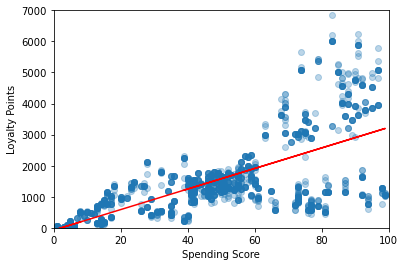

In [57]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0, 100)

# Label the axes.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [58]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [59]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 568.9785340762296, 'LM Test p-value': 9.365119473708356e-126, 'F-stat': 842.1307370457606, 'F-test p-value': 1.828604405005877e-151}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'spending_score'`).

We could apply a transformation to our data to address the heteroskedasticity issue. We will consider whether to do this after our presentation to our stakeholders at Turtle Games of our initial data analysis results.  

*Amount of variance explained by our model*\
With the caveat of the heteroskedasticity issue which might affect the reliability of our liner regression, the amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 45.2% (`'R-squared'` is 0.452).

# Week 2

In [60]:
# Import additional necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

## Week 2 | Goal
Identify insights that may help the marketing department at Turtle Games to group customers for the purposes of target marketing. 

We will continue working with the cleaned data in `'turtle_reviews.csv'`.

#### Week 2 | Step 1
Load the data and drop columns not needed.

In [61]:
# Load the CSV file with the clean data from week 1.
df_reviews_clustering = pd.read_csv('turtle_reviews_clean.csv')

In [62]:
# View DataFrame information.
df_reviews_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1750 non-null   int64  
 1   gender            1750 non-null   object 
 2   age               1750 non-null   int64  
 3   remuneration      1750 non-null   float64
 4   spending_score    1750 non-null   int64  
 5   loyalty_points    1750 non-null   int64  
 6   education         1750 non-null   object 
 7   product_code      1750 non-null   int64  
 8   review_full_text  1750 non-null   object 
 9   review_summary    1750 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 136.8+ KB


In [63]:
# Drop unnecessary columns.
df_reviews_clustering = df_reviews_clustering.drop(columns=[
    'Unnamed: 0',
    'gender',
    'age',
    'loyalty_points',
    'education',
    'product_code',
    'review_full_text',
    'review_summary'])

In [64]:
# View DataFrame information.
df_reviews_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    1750 non-null   float64
 1   spending_score  1750 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 27.5 KB


#### Week 2 | Step 2
Explore the data.

In [65]:
# Descriptive statistics.
df_reviews_clustering.describe()

,remuneration,spending_score
count,1750.000000,1750.000000
mean,47.464411,50.108571
std,23.521944,26.195458
min,12.300000,1.000000
25%,27.060000,32.000000
50%,46.740000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


#### Week 2 | Step 3
Plot the data.

Text(0, 0.5, 'Spending Score - 1-100')

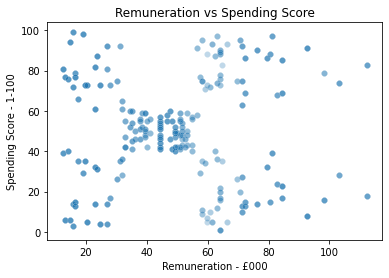

In [66]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                alpha=0.1,
                data = df_reviews_clustering)

plt.title('Remuneration vs Spending Score')
plt.xlabel('Remuneration - £000')
plt.ylabel('Spending Score - 1-100')

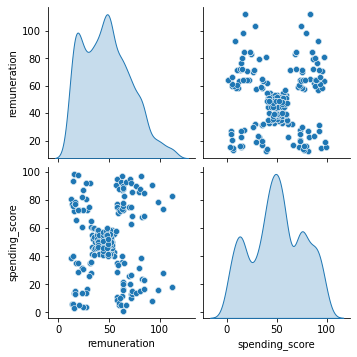

In [67]:
# Create a pairplot with Seaborn.
x = df_reviews_clustering[['remuneration', 'spending_score']]

sns.pairplot(df_reviews_clustering,
            vars = x,
            diag_kind = 'kde')

#### Week 2 | Step 4
Determine the number of clusters using the Elbow method.

In [68]:
# Prepare an elbow chart.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++',
                   max_iter = 300,
                   n_init = 10,
                   random_state = 0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

Text(0, 0.5, 'SS Distance')

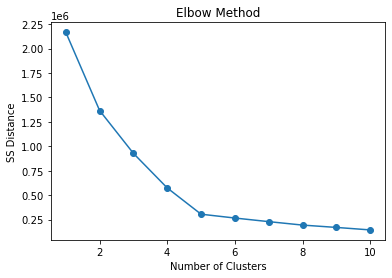

In [69]:
# Plot the elbow chart.
plt.plot(range(1,11),
        ss,
        marker = 'o')

plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SS Distance")

#### Week 2 | Step 5
Determine the number of clusters using the Silhouette method.

In [70]:
# Prepare a silhouette chart.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

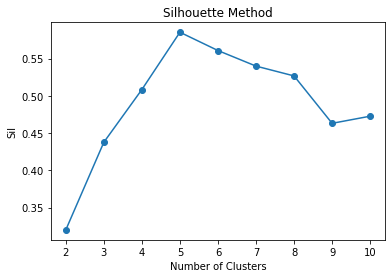

In [71]:
# Plot the silhouette chart.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sil")

plt.show()

#### Week 2 | Step 6
Evaluate the k-means model at different values of k.

**Five clusters**

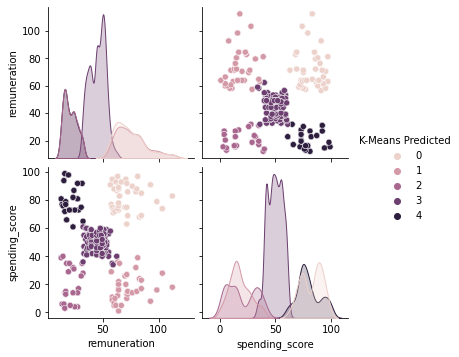

In [72]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [73]:
# Check the number of observations per predicted class for five clusters.
x['K-Means Predicted'].value_counts()

3    665
0    297
1    274
2    257
4    257
Name: K-Means Predicted, dtype: int64

In [74]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  2
1         12.30              81                  4
2         13.12               6                  2
3         13.12              77                  4
4         13.94              40                  2


**Three clusters**

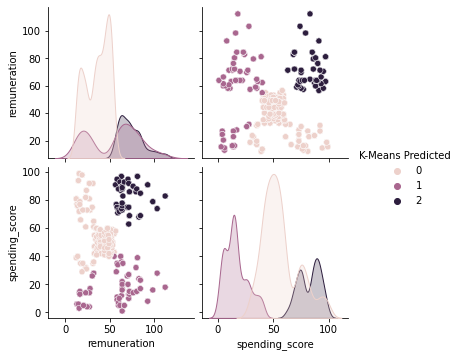

In [75]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [76]:
# Check the number of observations per predicted class for three clusters.
x['K-Means Predicted'].value_counts()

0    993
1    460
2    297
Name: K-Means Predicted, dtype: int64

In [77]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  0
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  0


**Seven clusters**

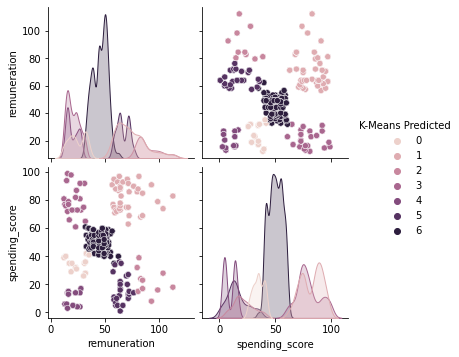

In [78]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [79]:
# Check the number of observations per predicted class for seven clusters.
x['K-Means Predicted'].value_counts()

6    627
1    297
3    257
5    170
4    147
0    142
2    110
Name: K-Means Predicted, dtype: int64

In [80]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  0
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  0


#### Week 2 | Step 7
Choose model.

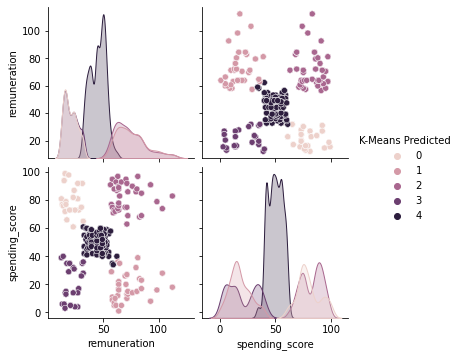

In [81]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [82]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

4    656
2    297
1    274
3    266
0    257
Name: K-Means Predicted, dtype: int64

#### Week 2 | Step 8
Plot and interpret the clusters.

Text(0, 0.5, 'Remuneration - £000')

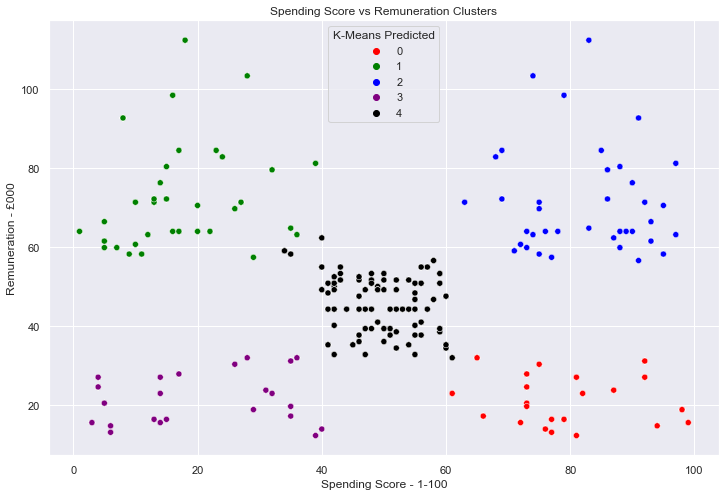

In [83]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x = 'spending_score' , 
                y ='remuneration',
                data = x,
                hue = 'K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple', 'black'])

plt.title("Spending Score vs Remuneration Clusters")
plt.xlabel("Spending Score - 1-100")
plt.ylabel("Remuneration - £000")

In [84]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

4    656
2    297
1    274
3    266
0    257
Name: K-Means Predicted, dtype: int64

In [85]:
# View the DataFrame information.
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   remuneration       1750 non-null   float64
 1   spending_score     1750 non-null   int64  
 2   K-Means Predicted  1750 non-null   int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 34.3 KB


In [86]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  0
2         13.12               6                  3
3         13.12              77                  0
4         13.94              40                  3


#### Week 2 | Step 9
*Insights*

Choosing the number of clusters is a key subject for discussion with the Turtle Games marketing department and other key stakeholders.

From the elbow and silhouette methods five clusters seems optimal given the location of where the elbow and the silhouette peak seem most pronounced.

Five clusters also seems optimal based on the scatterplots for the different options we considered. 

With five clusters we can envisage a marketting strategy whereby customers could be classified into:

| Cluster | Spending Score | Remuneration | Number of Customers | Percentage of Customers |
| :-------------- | :-------------- | :-------------- | :-------------- | :-------------- |
| Purple - 3 | Low | Low | 257 | 15% |
| Red - 0 | High | Low | 257 | 15% |
| Black - 4 | Medium | Medium | 665 | 38% |
| Green - 1 | Low | High | 274 | 15% |
| Blue - 2 | High | High | 297 | 17% |

*Questions to explore*

1. Are the 1,750 customers in our data set from the same country / city or countries / cities with comparable cost of living? The optimal clusters for different countries may differ. 
2. How is the spending score calculated? For example, over which period and taking into account which products? Does it take into account sales volume as well as profit margin?

# Week 3

## Week 3 | Goals
1. Share insights from sentiment analysis of online product review comments.
2. Identify the 15 most common words used in online product reviews
2. Prepare a list of the top 20 positive and top 20 negative online product reviews 

We will continue working with the cleaned data in `'turtle_reviews.csv'`.

In [87]:
# Import all the necessary packages.
import nltk 
import os 

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import Counter.
from collections import Counter

#### Week 3 | Preprocessing data for NLP
**Step 1**

Load the data and drop columns not needed.

In [88]:
# Load the CSV file with the clean data from week 1.
df_reviews_nlp = pd.read_csv('turtle_reviews_clean.csv')

In [89]:
# View DataFrame information.
df_reviews_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1750 non-null   int64  
 1   gender            1750 non-null   object 
 2   age               1750 non-null   int64  
 3   remuneration      1750 non-null   float64
 4   spending_score    1750 non-null   int64  
 5   loyalty_points    1750 non-null   int64  
 6   education         1750 non-null   object 
 7   product_code      1750 non-null   int64  
 8   review_full_text  1750 non-null   object 
 9   review_summary    1750 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 136.8+ KB


In [90]:
# Drop unnecessary columns.
df_reviews_nlp = df_reviews_nlp.drop(columns=[
    'Unnamed: 0',
    'gender',
    'age',
    'remuneration',
    'spending_score',
    'loyalty_points',
    'education',
    'product_code'])

In [91]:
# View DataFrame information.
df_reviews_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_full_text  1750 non-null   object
 1   review_summary    1750 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


**Comment**

We can see there are no missing values because `'Non-Null Count'` is 2000 for both columns.

**Step 2**

Change text to lower case and join words with a space.

In [92]:
# review_full_text: Change all to lower case and join with a space.
df_reviews_nlp['review_full_text'] = df_reviews_nlp['review_full_text'].str.lower()
df_reviews_nlp['review_full_text'] = df_reviews_nlp['review_full_text'].apply(lambda x: " ".join(x for x in x.split()))

In [93]:
# review_summary: Change all to lower case and join with a space.
df_reviews_nlp['review_summary'] = df_reviews_nlp['review_summary'].str.lower()
df_reviews_nlp['review_summary'] = df_reviews_nlp['review_summary'].apply(lambda x: " ".join(x for x in x.split()))

**Step 3**

Remove punctuation.

In [94]:
# review_full_text: Remove punctuation.
df_reviews_nlp['review_full_text'] = df_reviews_nlp['review_full_text'].str.replace('[^\w\s]','')

In [95]:
# View output.
df_reviews_nlp['review_full_text']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1745    the perfect word game for mixed ages with mom ...
1746    great game did not think i would like it when ...
1747             great game for all keeps the mind nimble
1748                                             fun game
1749    this game is fun a lot like scrabble without a...
Name: review_full_text, Length: 1750, dtype: object

In [96]:
# review_summary: Remove punctuation.
df_reviews_nlp['review_summary'] = df_reviews_nlp['review_summary'].str.replace('[^\w\s]','')

In [97]:
# View output.
df_reviews_nlp['review_summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1745        the perfect word game for mixed ages with mom
1746                                            super fun
1747                                           great game
1748                                           four stars
1749                                       love this game
Name: review_summary, Length: 1750, dtype: object

**Step 4**

Remove duplicate values.

In [98]:
# review_full_text: Check the number of duplicate values.
df_reviews_nlp['review_full_text'].duplicated().sum()

40

In [99]:
# review_full_text: Drop duplicates.
df_reviews_nlp = df_reviews_nlp.drop_duplicates(subset=['review_full_text'])

In [100]:
# View output.
df_reviews_nlp

,review_full_text,review_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1744,we are retired and find this a great way to st...,a great mind game
1745,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1746,great game did not think i would like it when ...,super fun
1747,great game for all keeps the mind nimble,great game


In [101]:
# review_summary: Check the number of duplicate values.
df_reviews_nlp['review_summary'].duplicated().sum()

500

In [102]:
# review_summary: Drop duplicates.
df_reviews_nlp = df_reviews_nlp.drop_duplicates(subset=['review_summary'])

In [103]:
# View output.
df_reviews_nlp

,review_full_text,review_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1739,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1740,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1742,great game to keep the mind active we play it ...,great game to keep the mind active
1744,we are retired and find this a great way to st...,a great mind game


**Step 5**

Tokenise.

In [104]:
# Create copy of df_reviews_nlp.
df_nlp_to_tokenise = df_reviews_nlp

In [105]:
# View output.
df_nlp_to_tokenise

,review_full_text,review_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1739,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1740,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1742,great game to keep the mind active we play it ...,great game to keep the mind active
1744,we are retired and find this a great way to st...,a great mind game


In [106]:
# review_full_text: Tokenise.
df_nlp_tokenised_full_text = df_nlp_to_tokenise['review_full_text'].apply(word_tokenize)

In [107]:
# Reset index.
df_nlp_tokenised_full_text = df_nlp_tokenised_full_text.reset_index()

# View output.
df_nlp_tokenised_full_text

,index,review_full_text
0,0,"[when, it, comes, to, a, dms, screen, the, spa..."
1,1,"[an, open, letter, to, galeforce9, your, unpai..."
2,2,"[nice, art, nice, printing, why, two, panels, ..."
3,3,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,"[as, my, review, of, gf9s, previous, screens, ..."
...,...,...
1205,1739,"[this, is, a, fun, card, game, for, people, wh..."
1206,1740,"[fun, for, the, family, just, make, certain, y..."
1207,1742,"[great, game, to, keep, the, mind, active, we,..."
1208,1744,"[we, are, retired, and, find, this, a, great, ..."


In [108]:
# review_summary: Tokenise.
df_nlp_tokenised_summary = df_nlp_to_tokenise['review_summary'].apply(word_tokenize)

In [109]:
# Reset index.
df_nlp_tokenised_summary = df_nlp_tokenised_summary.reset_index()

# View output.
df_nlp_tokenised_summary

,index,review_summary
0,0,"[the, fact, that, 50, of, this, space, is, was..."
1,1,"[another, worthless, dungeon, masters, screen,..."
2,2,"[pretty, but, also, pretty, useless]"
3,3,"[five, stars]"
4,4,"[money, trap]"
...,...,...
1205,1739,"[this, is, a, fun, card, game, for, people, wh..."
1206,1740,"[sort, of, a, card, game, equivalent, of, scra..."
1207,1742,"[great, game, to, keep, the, mind, active]"
1208,1744,"[a, great, mind, game]"


**Step 6**

Create unfiltered wordclouds

In [110]:
df_nlp_to_tokenise = df_nlp_to_tokenise.reset_index()

In [111]:
# review_full: Create an empty string variable.
all_comments_full = ''

# review_full: String all the comments together in a single variable.
for i in range(df_nlp_to_tokenise.shape[0]):
    all_comments_full = all_comments_full + df_nlp_to_tokenise['review_full_text'][i]

In [112]:
# Set the colour palette.
sns.set(color_codes = True)

# review_full: Create WordCloud.
word_cloud_full = WordCloud(width = 1600, height = 900,
                           background_color = 'white',
                           colormap = 'plasma',
                           stopwords = 'none',
                           min_font_size = 10).generate(all_comments_full)

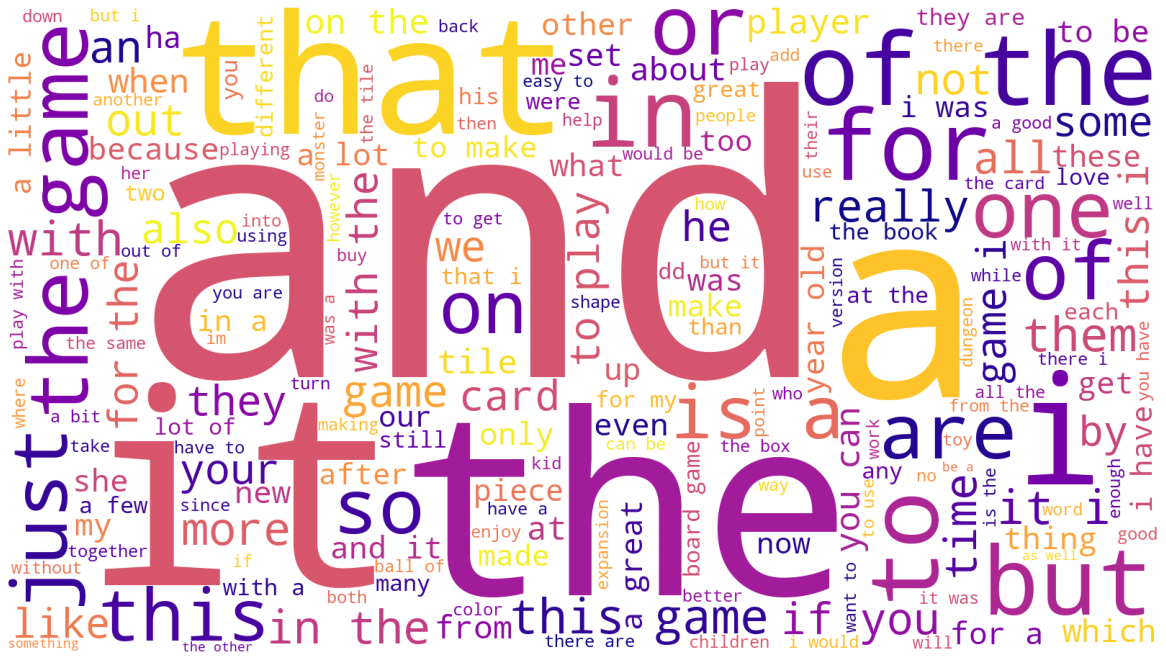

In [113]:
# review_full: Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_full) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [114]:
# review_summary: Create an empty string variable.
all_comments_summary = ''

# review_summary: String all the comments together in a single variable.
for i in range(df_nlp_to_tokenise.shape[0]):
    all_comments_summary = all_comments_summary + df_nlp_to_tokenise['review_summary'][i]

In [115]:
# Set the colour palette.
sns.set(color_codes = True)

# review_summary: Create WordCloud.
word_cloud_summary = WordCloud(width = 1600, height = 900,
                           background_color = 'white',
                           colormap = 'plasma',
                           stopwords = 'none',
                           min_font_size = 10).generate(all_comments_summary)

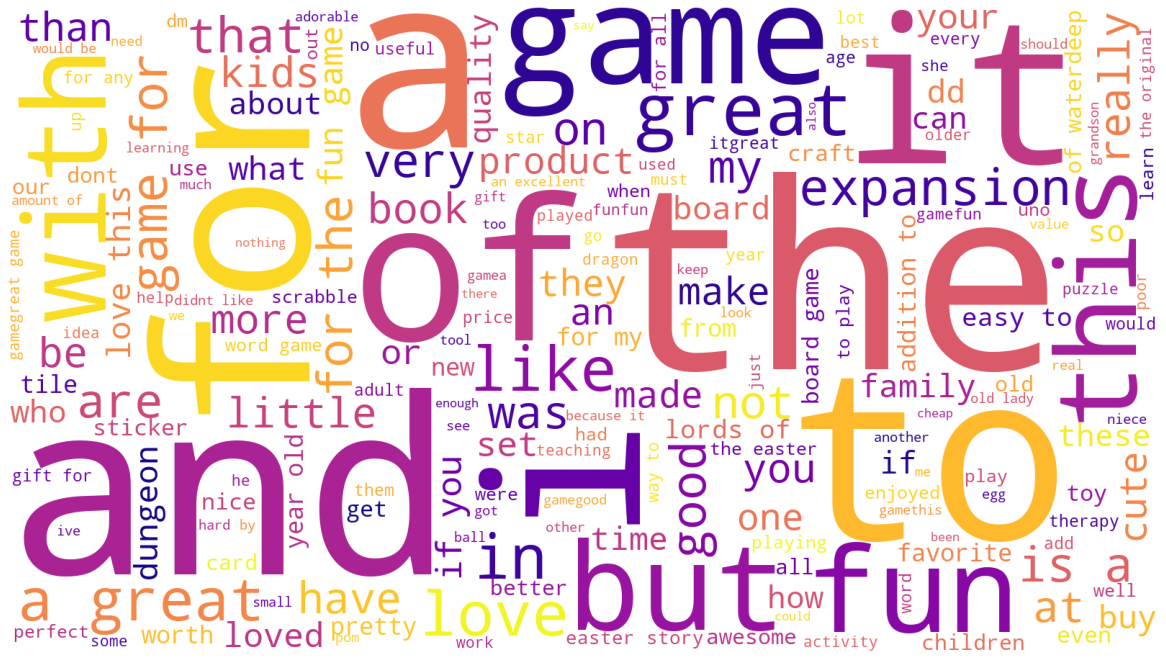

In [116]:
# review_summary: Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

**Step 7**

Frequency distribution

In [117]:
# review_full: set an empty list of tokens.
all_tokens_full = []

for i in range(df_nlp_tokenised_full_text.shape[0]):
    all_tokens_full = all_tokens_full + df_nlp_tokenised_full_text['review_full_text'][i]

In [118]:
# review_full: Calculate the frequency distribution.
fdist_full = FreqDist(all_tokens_full)

# Preview data.
fdist_full

FreqDist({'the': 4516, 'and': 2619, 'to': 2545, 'a': 2498, 'of': 2019, 'i': 1716, 'it': 1649, 'is': 1431, 'this': 1395, 'for': 1220, ...})

In [119]:
# review_summary: set an empty list of tokens.
all_tokens_summary = []

for i in range(df_nlp_tokenised_summary.shape[0]):
    all_tokens_summary = all_tokens_summary + df_nlp_tokenised_summary['review_summary'][i]

In [120]:
# review_summary: Calculate the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'game': 248, 'the': 237, 'a': 217, 'great': 210, 'for': 206, 'to': 175, 'fun': 166, 'and': 151, 'it': 125, 'of': 118, ...})

**Step 8**

Remove alphanumeric characters and stopwords

In [121]:
# review_full: Filter out alphanumeric tokens.
tokens_full = [word for word in all_tokens_full if word.isalnum()]

In [122]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

In [123]:
# review_full: Filter out stopword tokens.
tokens_full = [x for x in tokens_full if x.lower() not in english_stopwords]

In [124]:
# review_full: Define an empty string variable.
tokens_full_string = ''

for value in tokens_full:
    tokens_full_string = tokens_full_string + value + ' '

In [125]:
# review_summary: Filter out alphanumeric tokens.
tokens_summary = [word for word in all_tokens_summary if word.isalnum()]

In [126]:
# review_summary: Filter out stopword tokens.
tokens_summary = [x for x in tokens_summary if x.lower() not in english_stopwords]

In [127]:
# review_summary: Define an empty string variable.
tokens_summary_string = ''

for value in tokens_summary:
    tokens_summary_string = tokens_summary_string + value + ' '

**Step 9**

Create wordclouds without stopwords and without alphanumeric tokens 

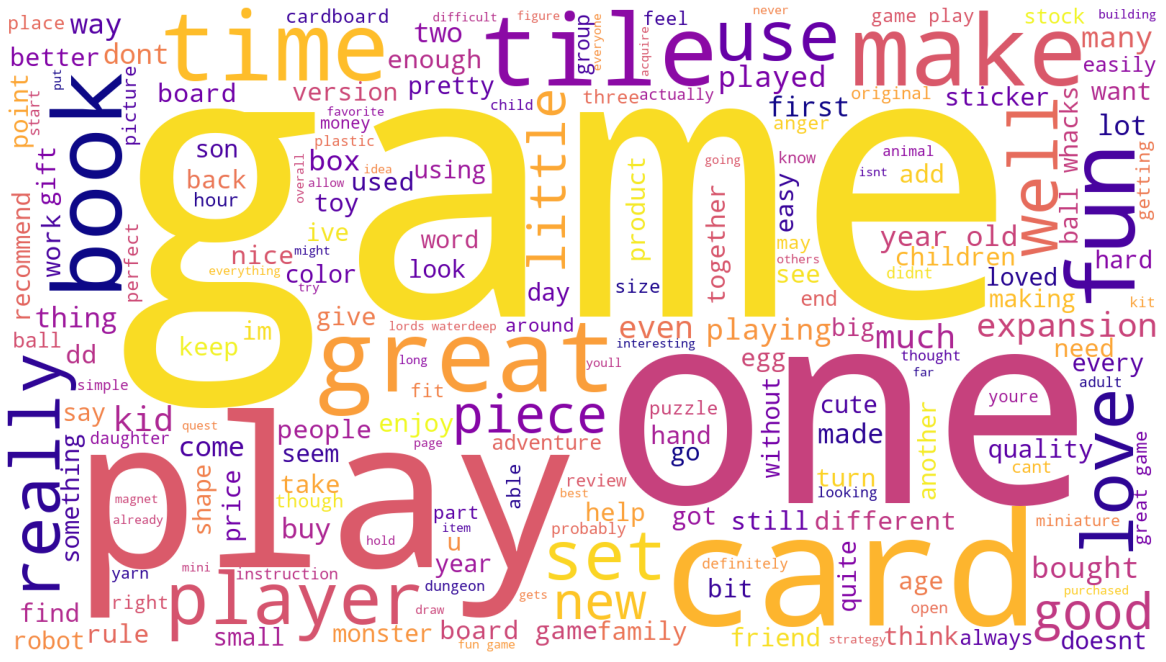

In [128]:
# review_full: Create a wordcloud.
wordcloud_full = WordCloud(width = 1600, height = 900,
                           background_color ='white',
                           colormap='plasma',
                           min_font_size = 10).generate(tokens_full_string) 

# Plot the wordcloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_full) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

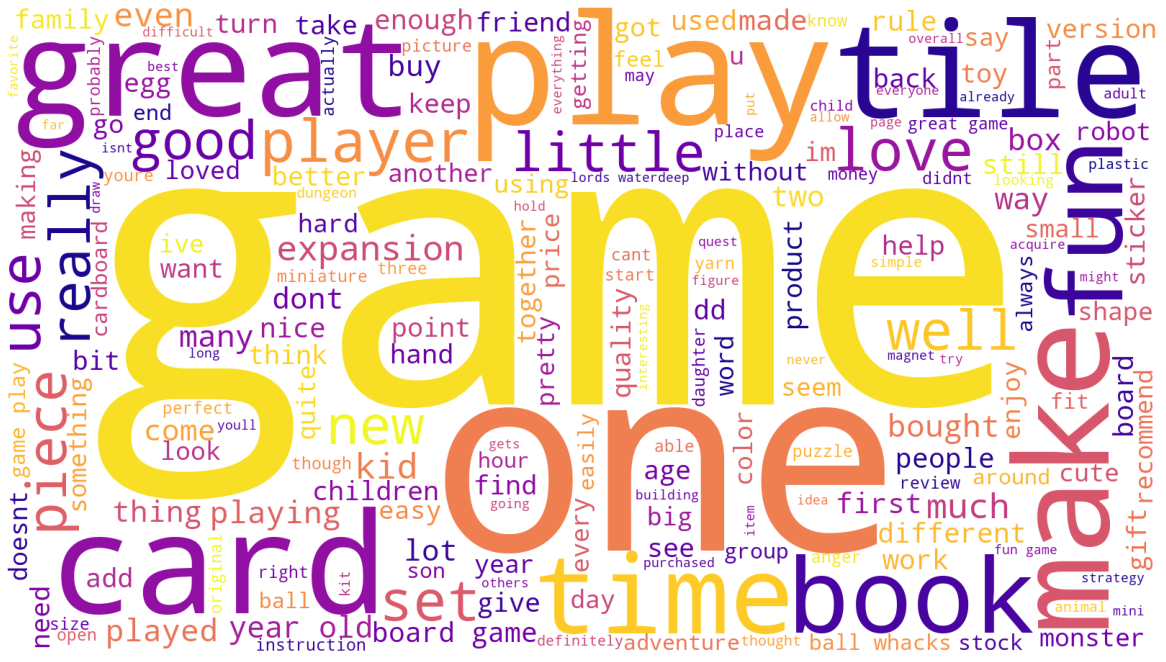

In [129]:
# review_summary: Create a wordcloud.
wordcloud_summary = WordCloud(width = 1600, height = 900,
                              background_color ='white',
                              colormap='plasma',
                              min_font_size = 10).generate(tokens_full_string) 

# Plot the wordcloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#### Week 3 | Goal 1

Identify the 15 most common words used in online product reviews

In [130]:
# reviews_full: Generate a DataFrame from Counter.
counts_full = pd.DataFrame(Counter(tokens_full).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# View output.
counts_full

,Frequency
Word,
game,1192
one,416
play,392
fun,376
great,343
like,336
get,266
really,254
cards,239


In [131]:
# reviews_summary: Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# View output.
counts_summary

,Frequency
Word,
game,248
great,210
fun,166
good,73
love,58
like,48
kids,43
cute,39
expansion,39


Review polarity and sentiment

Full text

In [132]:
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

In [133]:
TextBlob

textblob.blob.TextBlob

In [134]:
# Create an object for the sentiment analysis.
sia = SentimentIntensityAnalyzer()

In [135]:
# review_full: create list of comments.
full_text_list = df_nlp_to_tokenise['review_full_text'].tolist()

In [136]:
# review_full: Apply sentiment analysis.
dict_polarity_full = {"".join(_) : sia.polarity_scores("".join(_)) for _ in full_text_list}

In [137]:
# review_full: View length of the dictionary.
len(dict_polarity_full)

1210

In [138]:
# review_full: Convert the dictionary to a Pandas DataFrame.
df_polarity_full = pd.DataFrame(dict_polarity_full).T

In [139]:
# review_full: View the polarity DataFrame.
df_polarity_full.head()

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.103,0.841,0.056,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.097,0.705,0.198,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.143,0.724,0.134,-0.8334
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.514,0.486,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.196,0.804,0.000,-0.6808


In [140]:
# review_full: See the basic statistics for the 'compound' column.
df_polarity_full['compound'].describe()

count    1210.000000
mean        0.670422
std         0.410635
min        -0.982800
25%         0.599400
50%         0.836000
75%         0.932400
max         0.999400
Name: compound, dtype: float64

<AxesSubplot:>

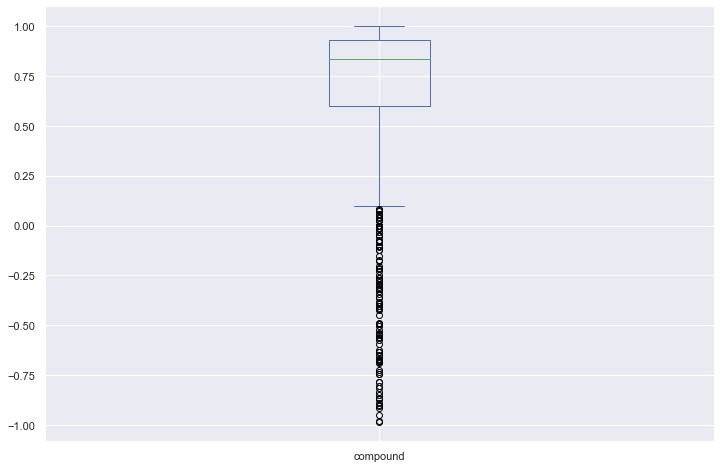

In [141]:
# review_full: Visualise box plot.
_box_plot_full = df_polarity_full.reset_index()['compound'].sort_values()
_box_plot_full.plot(kind = 'box')

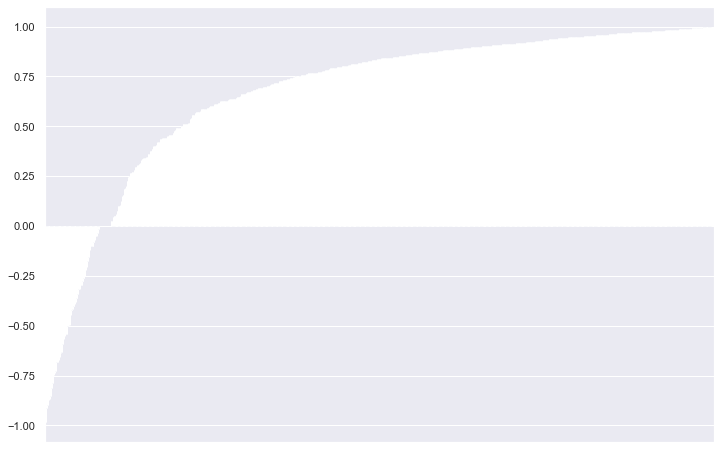

In [142]:
# review_full: Visualise bar plot.
_bar_plot_full = df_polarity_full.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_bar_plot_full.plot(kind = 'bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

Summary

In [143]:
# review_summary: create list of comments.
summary_text_list = df_nlp_to_tokenise['review_summary'].tolist()

In [144]:
# review_summary: Apply sentiment analysis.
dict_polarity_summary = {"".join(_) : sia.polarity_scores("".join(_)) for _ in summary_text_list}

In [145]:
# review_summary: View length of the dictionary.
len(dict_polarity_summary)

1210

In [146]:
# review_summary: Convert the dictionary to a Pandas DataFrame.
df_polarity_summary = pd.DataFrame(dict_polarity_summary).T

In [147]:
# review_summary: View the polarity DataFrame.
df_polarity_summary.head()

,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182


In [148]:
# review_summary: See the basic statistics for the 'compound' column.
df_polarity_summary['compound'].describe()

count    1210.000000
mean        0.385073
std         0.348058
min        -0.905200
25%         0.000000
50%         0.510600
75%         0.624900
max         0.952400
Name: compound, dtype: float64

<AxesSubplot:>

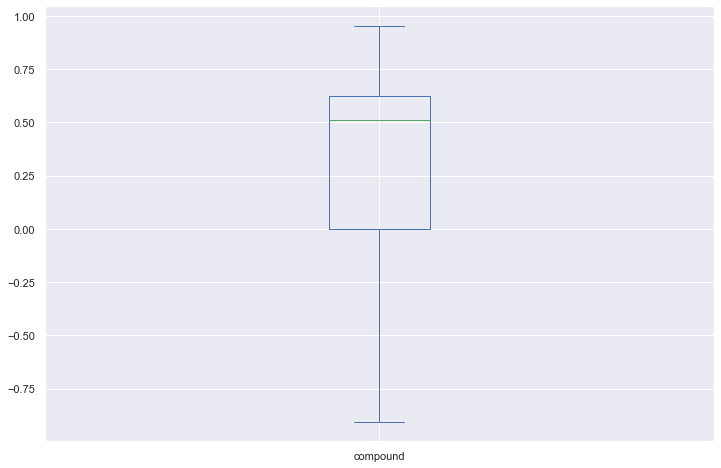

In [149]:
# review_summary: Visualise box plot.
_box_plot_summary = df_polarity_summary.reset_index()['compound'].sort_values()
_box_plot_summary.plot(kind = 'box')

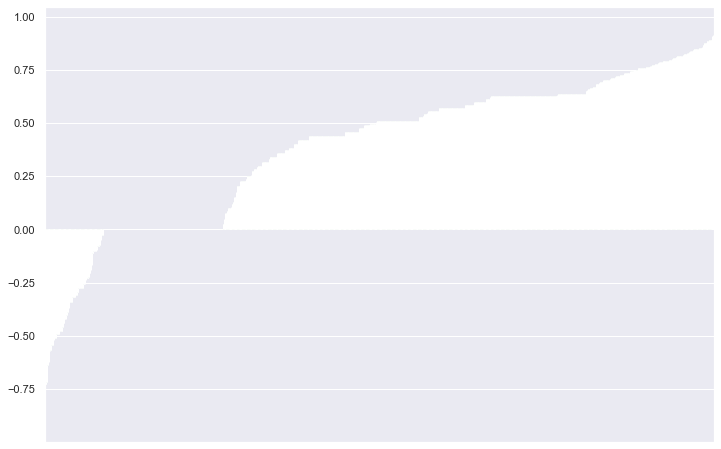

In [150]:
# review_summary: Visualise bar plot.
_bar_plot_summary = df_polarity_summary.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_bar_plot_summary.plot(kind = 'bar', color = 'g')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

#### Week 3 | Goal 2
Prepare a list of the top 20 positive and top 20 negative online product reviews

In [151]:
# reviews_full: Top 20 negative.
df_polarity_full.sort_values('compound', ascending=1).head(20)

neg    neu    pos  \
here is my review crossposted from boardgamegee...  0.140  0.735  0.125   
the one ring is a very innovative rpg set in mi...  0.135  0.780  0.086   
i bought this thinking it would be really fun  ...  0.336  0.622  0.042   
this is a fun game for kids its basically the g...  0.217  0.674  0.109   
a crappy cardboard ghost of the original hard t...  0.470  0.474  0.056   
the game is amazing the new version is not card...  0.208  0.716  0.076   
for those just getting started in the dnd world...  0.114  0.800  0.086   
the ball of whacks can be a valuable tool for d...  0.201  0.645  0.154   
my 8 yearold granddaughter and i were very frus...  0.289  0.649  0.063   
its really uno type game but anger control stuf...  0.280  0.600  0.121   
i thought i was getting a new product but the b...  0.152  0.848  0.000   
nice art nice printing why two panels are fille...  0.143  0.724  0.134   
its uno with questions about anger its an okay ...  0.279  0.680  0.041   
this is horrible the directions are very hard f...  0.223  0.720  0.056   
firstly this game is excellent the previous edi...  0.124  0.791  0.085   
if i could give this egg zero stars i would it ...  0.156  0.809  0.035   
my son loves the books but was very disappointe...  0.142  0.765  0.093   
im an ot and i intended on using it with my agg...  0.186  0.814  0.000   
so i work as a mental health clinician in a loc...  0.188  0.657  0.155   
its really annoying because when you click the ...  0.132  0.868  0.000   

                                                    compound  
here is my review crossposted from boardgamegee...   -0.9828  
the one ring is a very innovative rpg set in mi...   -0.9821  
i bought this thinking it would be really fun  ...   -0.9520  
this is a fun game for kids its basically the g...   -0.9146  
a crappy cardboard ghost of the original hard t...   -0.9052  
the game is amazing the new version is not card...   -0.8984  
for those just getting started in the dnd world...   -0.8908  
the ball of whacks can be a valuable tool for d...   -0.8722  
my 8 yearold granddaughter and i were very frus...   -0.8674  
its really uno type game but anger control stuf...   -0.8668  
i thought i was getting a new product but the b...   -0.8518  
nice art nice printing why two panels are fille...   -0.8334  
its uno with questions about anger its an okay ...   -0.8126  
this is horrible the directions are very hard f...   -0.8067  
firstly this game is excellent the previous edi...   -0.7859  
if i could give this egg zero stars i would it ...   -0.7845  
my son loves the books but was very disappointe...   -0.7468  
im an ot and i intended on using it with my agg...   -0.7425  
so i work as a mental health clinician in a loc...   -0.7351  
its really annoying because when you click the ...   -0.7245

In [152]:
# reviews_summary: Top 20 negative.
df_polarity_summary.sort_values('compound', ascending=1).head(20)

,neg,neu,pos,compound
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.470,0.474,0.056,-0.9052
the tardis the doctor river song amy rory fight every enemy in cards,0.357,0.643,0.000,-0.7269
no 20 sided die,0.753,0.247,0.000,-0.7269
defective poor qc,0.857,0.143,0.000,-0.7184
then you will find this board game to be dumb and boring,0.359,0.641,0.000,-0.6808
before this i hated running any rpg campaign dealing with towns because it,0.259,0.741,0.000,-0.6369
but it gets repetitive and the students start to get bored after about half a round,0.269,0.731,0.000,-0.6310
worst quality adult board game ive even seen,0.369,0.631,0.000,-0.6249
anger control game,0.649,0.351,0.000,-0.5719
adds a needed amount of tension in a tense fantasy world,0.343,0.657,0.000,-0.5719


In [153]:
# reviews_full: Top 20 positive.
df_polarity_full.sort_values('compound', ascending=0).head(20)

neg    neu    pos  \
whenever i see this game on my shelf i get a di...  0.021  0.861  0.118   
if you only employ one creativityenhancing reso...  0.043  0.804  0.153   
this kit is awesome my 5year old daughter and i...  0.022  0.743  0.235   
i grew up playing monopoly lots of people did i...  0.016  0.827  0.157   
lords of waterdeep was awesome and scoundrels o...  0.062  0.796  0.142   
lords of waterdeep scoundrels of skullport is a...  0.024  0.809  0.167   
we own this game as well as castle ravenloft on...  0.047  0.774  0.179   
the short short version wrath of ashardalon is ...  0.087  0.707  0.207   
doctor who the card game was created by martin ...  0.055  0.785  0.160   
who am i middle aged married guy who loves sci ...  0.073  0.791  0.137   
i have a wife and kids  i dont have time to be ...  0.071  0.768  0.161   
monopoly is fun but it takes forever to play th...  0.034  0.757  0.210   
we were sooo excited to see the easter story eg...  0.008  0.801  0.191   
i just bought this game with my 8 year old son ...  0.019  0.754  0.227   
overall i love this board game i havent played ...  0.040  0.681  0.279   
acquire may not be as old as monopoly but it is...  0.037  0.827  0.136   
this game requires lords of waterdeep to play i...  0.012  0.732  0.256   
the first thing anyone who sees this for the fi...  0.007  0.838  0.155   
i dont know if ive ever taken more delight real...  0.083  0.777  0.140   
if you enjoy word games im guessing that youll ...  0.031  0.715  0.254   

                                                    compound  
whenever i see this game on my shelf i get a di...    0.9994  
if you only employ one creativityenhancing reso...    0.9991  
this kit is awesome my 5year old daughter and i...    0.9991  
i grew up playing monopoly lots of people did i...    0.9987  
lords of waterdeep was awesome and scoundrels o...    0.9985  
lords of waterdeep scoundrels of skullport is a...    0.9984  
we own this game as well as castle ravenloft on...    0.9975  
the short short version wrath of ashardalon is ...    0.9974  
doctor who the card game was created by martin ...    0.9970  
who am i middle aged married guy who loves sci ...    0.9967  
i have a wife and kids  i dont have time to be ...    0.9965  
monopoly is fun but it takes forever to play th...    0.9964  
we were sooo excited to see the easter story eg...    0.9963  
i just bought this game with my 8 year old son ...    0.9962  
overall i love this board game i havent played ...    0.9961  
acquire may not be as old as monopoly but it is...    0.9960  
this game requires lords of waterdeep to play i...    0.9957  
the first thing anyone who sees this for the fi...    0.9956  
i dont know if ive ever taken more delight real...    0.9956  
if you enjoy word games im guessing that youll ...    0.9955

In [154]:
# reviews_summary: Top 20 positive.
df_polarity_summary.sort_values('compound', ascending=0).head(20)

,neg,neu,pos,compound
wow what a great set of tiles for such a great price a great starter set,0.0,0.427,0.573,0.9524
easy to learn great fun to play,0.0,0.191,0.809,0.9136
loves stickers and she loves peppa so this was perfect,0.0,0.381,0.619,0.9074
great quality very cute and perfect for my toddler,0.0,0.346,0.654,0.9073
but the kids really like it and helps start good discussion,0.0,0.422,0.578,0.8988
great game value for the price is great also,0.0,0.361,0.639,0.8910
great game great value,0.0,0.086,0.914,0.8910
i wish all those who buy better luck fairly easy to understand and plenty of,0.0,0.489,0.511,0.8885
easy fun fast and thoroughly enjoyable for adults as well as kids age eight and above,0.0,0.511,0.489,0.8883
he loves construction vehicles so i am sure he will love this also,0.0,0.489,0.511,0.8876


Insights


- The summary statistics from the sentiment analysis are positive.
- The full text comments show a lower level of polarisation compared to the summary comments.
- The full text comments also show a higher number of negative sentiment outliers.
- The lists of most common words seem not to include words with a negative sentiment.
